## 1. Question 1

Read in the data in the file “Portfolios_Formed_on_ME_monthly_EW.csv” as we did in the lab sessions.We performed a series of analysis on the ‘Lo 10’ and the ‘Hi 10’ columns which are the returns of the lowest and highest decile portfolios. For purposes of this assignment, we will use the lowest and highest quintile portfolios, which are labelled ‘Lo 20’ and ‘Hi 20’ respectively.
What was the Annualized Return of the Lo 20 portfolio over the entire period?

Enter the answer as a percentage. e.g. if your answer is 23.43% enter the number 23.43

15.19

In [67]:
import pandas as pd
import numpy as np

In [68]:
me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                   header=0, index_col=0, parse_dates=True, na_values=-99.99)
me_m.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [69]:
me_m.index = pd.to_datetime(me_m.index, format="%Y%m")
me_m.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [70]:
cols = ['Lo 20', 'Hi 20']
returns = me_m[cols]
returns.head()

,Lo 20,Hi 20
1926-07-01,-0.57,3.33
1926-08-01,3.84,2.33
1926-09-01,-0.48,-0.09
1926-10-01,-3.29,-2.95
1926-11-01,-0.55,3.16


In [71]:
returns = returns/100

In [72]:
returns

,Lo 20,Hi 20
1926-07-01,-0.0057,0.0333
1926-08-01,0.0384,0.0233
1926-09-01,-0.0048,-0.0009
1926-10-01,-0.0329,-0.0295
1926-11-01,-0.0055,0.0316
...,...,...
2018-08-01,0.0309,0.0249
2018-09-01,-0.0204,0.0019
2018-10-01,-0.1052,-0.0741
2018-11-01,-0.0278,0.0249


In [73]:
returns.columns = ['SmallCap', 'LargeCap']

In [74]:
returns

,SmallCap,LargeCap
1926-07-01,-0.0057,0.0333
1926-08-01,0.0384,0.0233
1926-09-01,-0.0048,-0.0009
1926-10-01,-0.0329,-0.0295
1926-11-01,-0.0055,0.0316
...,...,...
2018-08-01,0.0309,0.0249
2018-09-01,-0.0204,0.0019
2018-10-01,-0.1052,-0.0741
2018-11-01,-0.0278,0.0249


In [78]:
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

SmallCap    0.336701
LargeCap    0.195116
dtype: float64

In [79]:
n_months = returns.shape[0]
return_per_month = (returns+1).prod()**(1/n_months) - 1
return_per_month

SmallCap    0.011860
LargeCap    0.007859
dtype: float64

In [80]:
annualized_return = (return_per_month + 1)**12-1

In [82]:
annualized_return = (returns+1).prod()**(12/n_months) - 1
annualized_return["SmallCap"]

0.15197701163833743

## 2. Question 2

What was the Annualized Volatility of the Lo 20 portfolio over the entire period? 

33.26

In [83]:
annualized_vol = returns.std()*(12**0.5)
annualized_vol["SmallCap"]

0.3367012751715777

## 3. Question 3

What was the Annualized Return of the Hi 20 portfolio over the entire period?    

9.84

In [84]:
annualized_return = (returns+1).prod()**(12/n_months) - 1
annualized_return["LargeCap"]

0.09849020951253151

## 4. Question 4

What was the Annualized Volatility of the Hi 20 portfolio over the entire period ?  

19.51

In [64]:
annualized_vol = returns.std()*(12**0.5)
annualized_vol["LargeCap"]

0.19511604155631326

## 5. Question 5

What was the Annualized Return of the Lo 20 portfolio over the period 1999 - 2015 (both inclusive)?

11.44

In [49]:
returns9915=returns["1999":"2015"]

In [52]:
n_months = returns9915.shape[0]
return_per_month = (returns9915+1).prod()**(1/n_months) - 1
return_per_month

SmallCap    0.009069
LargeCap    0.005094
dtype: float64

In [63]:
annualized_return = (returns9915+1).prod()**(12/n_months) - 1
annualized_return["SmallCap"]    

0.11442634058514933

## 6. Question 6

What was the Annualized Volatility of the Lo 20 portfolio over the period 1999 - 2015 (both inclusive)? 

22.88

In [62]:
annualized_vol = returns9915.std()*(12**0.5)
annualized_vol["SmallCap"]

0.22889447266699597

## 7. Question 7

What was the Annualized Return of the Hi 20 portfolio over the period  1999 - 2015 (both inclusive)?

6.28

In [61]:
annualized_return = (returns9915+1).prod()**(12/n_months) - 1
annualized_return["LargeCap"]

0.06286512130085109

## 8. Question 8

What was the Annualized Volatility of the Hi 20 portfolio over the period 1999 - 2015 (both inclusive)?

17.27

In [60]:
annualized_vol = returns9915.std()*(12**0.5)
annualized_vol["LargeCap"]

0.1727133212125047

## 9. Question 9

What was the Max Drawdown (expressed as a positive number) experienced over the 1999-2015 period in the SmallCap (Lo 20) portfolio?

62.48

In [101]:
returns9915.index = returns9915.index.to_period('M')

<AxesSubplot:>

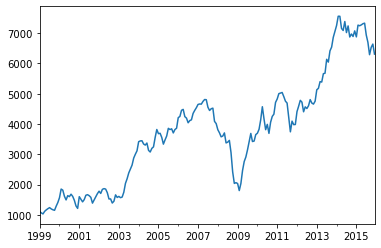

In [102]:
wealth_index = 1000*(1+returns9915["SmallCap"]).cumprod()
wealth_index.plot()

<AxesSubplot:>

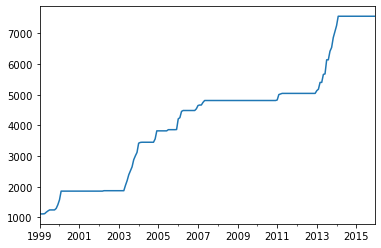

In [103]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot()

<AxesSubplot:>

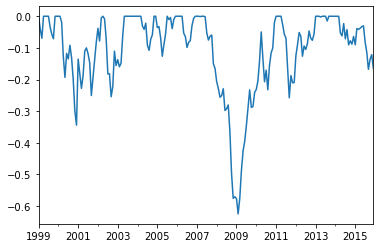

In [104]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

In [105]:
drawdown.min()

-0.6248092431236988

In [106]:
drawdown["2009":].min()

-0.6248092431236988

## 10. Question 10

At the end of which month over the period 1999-2015 did that maximum drawdown on the SmallCap (Lo 20) portfolio occur? 

2009-02

In [107]:
drawdown["1999":"2015"].idxmin()

Period('2009-02', 'M')

## 11. Question 11

What was the Max Drawdown (expressed as a positive number) experienced over the 1999-2015 period in the LargeCap (Hi 20) portfolio?

55.27

In [108]:
wealth_index = 1000*(1+returns9915["LargeCap"]).cumprod()
previous_peaks = wealth_index.cummax()
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.min()

-0.5527349978713653

## 12. Question 12

Over the period 1999-2015, at the end of which month did that maximum drawdown of the LargeCap (Hi 20) portfolio occur?

2009-02

In [109]:
drawdown["1999":"2015"].idxmin()

Period('2009-02', 'M')

## 13. Question 13

For the remaining questions, use the EDHEC Hedge Fund Indices data set that we used in the lab assignment and load them into Python. Looking at the data since 2009 (including all of 2009) through 2018 which Hedge Fund Index has exhibited the highest semideviation?

Short Selling

In [138]:
import edhec_risk_kit as erk
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [139]:
hfi = erk.get_hfi_returns()

In [140]:
hfi0918=hfi["2009":"2018"]

In [141]:
erk.semideviation(hfi0918)

Convertible Arbitrage     0.006681
CTA Global                0.010996
Distressed Securities     0.009498
Emerging Markets          0.015276
Equity Market Neutral     0.005186
Event Driven              0.010135
Fixed Income Arbitrage    0.003321
Global Macro              0.005075
Long/Short Equity         0.012139
Merger Arbitrage          0.003611
Relative Value            0.005711
Short Selling             0.021240
Funds Of Funds            0.007948
dtype: float64

In [142]:
erk.semideviation(hfi0918).sort_values()

Fixed Income Arbitrage    0.003321
Merger Arbitrage          0.003611
Global Macro              0.005075
Equity Market Neutral     0.005186
Relative Value            0.005711
Convertible Arbitrage     0.006681
Funds Of Funds            0.007948
Distressed Securities     0.009498
Event Driven              0.010135
CTA Global                0.010996
Long/Short Equity         0.012139
Emerging Markets          0.015276
Short Selling             0.021240
dtype: float64

## 14. Question 14

Looking at the data since 2009 (including all of 2009) which Hedge Fund Index has exhibited the lowest semideviation?   
Fixed Income Arbitrage    


In [143]:
erk.semideviation(hfi0918).sort_values()

Fixed Income Arbitrage    0.003321
Merger Arbitrage          0.003611
Global Macro              0.005075
Equity Market Neutral     0.005186
Relative Value            0.005711
Convertible Arbitrage     0.006681
Funds Of Funds            0.007948
Distressed Securities     0.009498
Event Driven              0.010135
CTA Global                0.010996
Long/Short Equity         0.012139
Emerging Markets          0.015276
Short Selling             0.021240
dtype: float64

## 15. Question 15

Looking at the data since 2009 (including all of 2009) which Hedge Fund Index has been most negatively skewed?     

Equity Market Neutral

In [144]:
hfi09=hfi["2009":]

In [145]:
pd.concat([hfi09.mean(), hfi09.median(), hfi09.mean()>hfi09.median()], axis=1)

,0,1,2
Convertible Arbitrage,0.006623,0.0045,True
CTA Global,0.000497,-0.0003,True
Distressed Securities,0.006559,0.0082,False
Emerging Markets,0.005205,0.0061,False
Equity Market Neutral,0.002556,0.0032,False
Event Driven,0.005595,0.0070,False
Fixed Income Arbitrage,0.005478,0.0050,True
Global Macro,0.002676,0.0020,True
Long/Short Equity,0.005209,0.0064,False
Merger Arbitrage,0.003716,0.0047,False


In [128]:
def skewness(r):
    """
    Alternative to scipy.stats.skew()
    Computes the skewness of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**3).mean()
    return exp/sigma_r**3

In [146]:
erk.skewness(hfi09).sort_values()

Equity Market Neutral    -0.896327
Funds Of Funds           -0.646908
Merger Arbitrage         -0.551065
Event Driven             -0.488821
Long/Short Equity        -0.463703
Distressed Securities    -0.254944
Emerging Markets          0.033123
CTA Global                0.052062
Relative Value            0.159953
Global Macro              0.348184
Short Selling             0.456518
Fixed Income Arbitrage    1.121453
Convertible Arbitrage     1.305911
dtype: float64

## 16. Question 16

Looking at the data since 2000 (including all of 2000) through 2018 which Hedge Fund Index has exhibited the highest kurtosis?     

Fixed Income Arbitrage

In [131]:
hfi0018=hfi["2000":"2018"]

In [135]:
erk.kurtosis(hfi0018).sort_values()

CTA Global                 2.845022
Global Macro               3.653278
Short Selling              4.352758
Long/Short Equity          4.472589
Merger Arbitrage           4.520785
Event Driven               5.543444
Emerging Markets           5.941289
Distressed Securities      6.231720
Funds Of Funds             7.584725
Relative Value            12.731096
Equity Market Neutral     20.329621
Convertible Arbitrage     23.001449
Fixed Income Arbitrage    33.378729
dtype: float64